## Introduction

In this Notebook we will explore how to implement two important applications of PCA.

1. The first application illustrates how we can use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in our data.

2. For the second application, we will use PCA to project higher dimensional data down to a lower dimensional feature space. This is an example of dimension reduction, a powerful technique that has multiple benefits, including reducing our model-building computational load and, in many cases, the accuracy of our model. PCA can help filter out redundant, linearly correlated variables and reduce the amount of noise in our data.


# Part I: Using PCA to project 2-D data onto its principal axes
Here, we will illustrate how we can use PCA to transform our 2-D data to represent it in terms of its principal axes - the projection of our data onto the two orthogonal directions that explain most of the variance in our data. Let's see what all of this means.


### Load libraries
Let's begin by importing the needed libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### Create dataset
Next we will create a 2-dimensional dataset containing two linearly correlated features.

we will use a bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.


In [2]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

In [3]:
X.shape

(200, 2)

### Visualize the relationship between the two features.


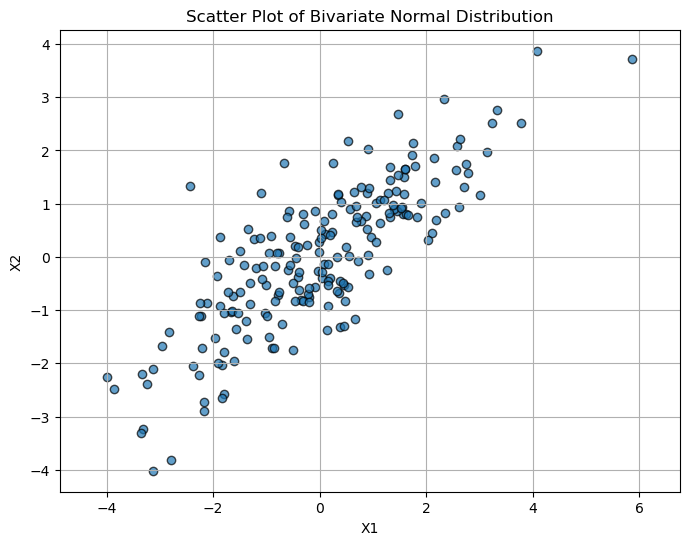

In [4]:
# Scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1], edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

Consider the main direction the data follows in the scatterplot. It's actually the direction of the first principal component.
we can use PCA to determine this direction.

###  Perform PCA on the dataset
Next, we will initialize a 2-component PCA model with default parameters and then fit and transform the feature space in one step.


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

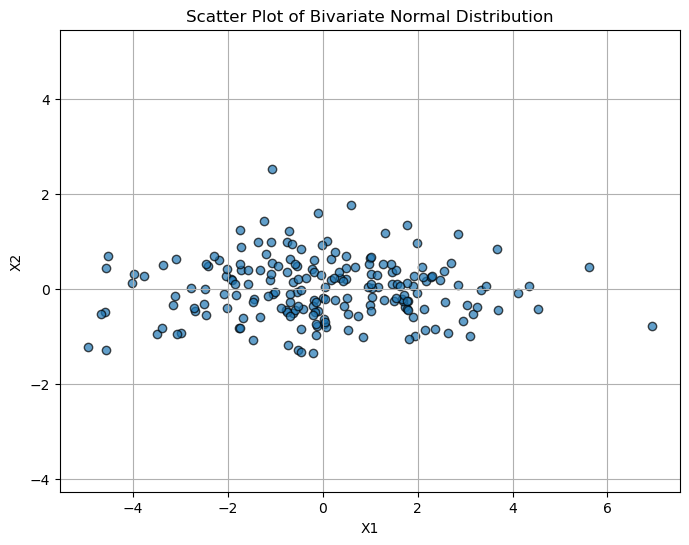

In [6]:
# Scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0],X_pca[:,1], edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

### Get the principal components from the model. 
The principal components are the principal axes, represented in feature space coordinates, 
which align with the directions of maximum variance in our data. 


In [7]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

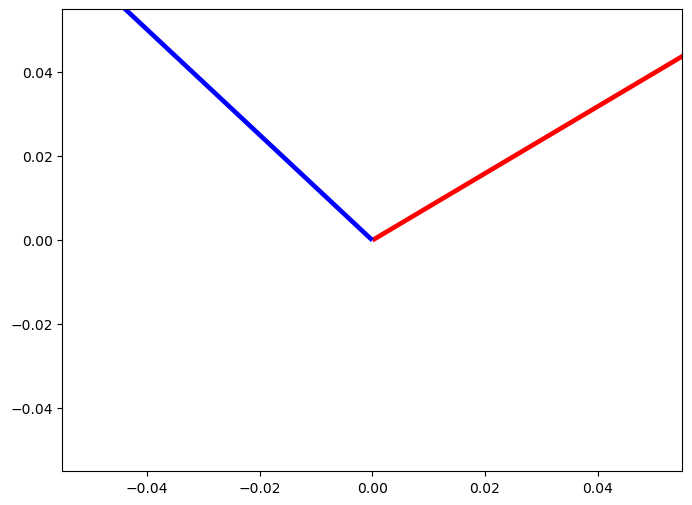

In [8]:
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, components[0, 0], components[0, 1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
plt.quiver(0, 0, components[1, 0], components[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='PC2')

The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:


In [9]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

### What percentage of the variance in the data is explained by the first principal component?


91.11946

### Display the results
Here, we will use a scatterplot to display the data points in their original feature space, X1, X2.

we will also plot the projections of the data points onto their principal component directions.

It's a bit technical, requiring some understanding of linear algebra, but the outcome will be instructive.

Let's see how this works.

#### Project the data onto its principal component axes
The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction. 

The new coordinates are given by the dot products of each point's coordinates with the given PCA component. 

Specifically, the projections are given by:


In [10]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

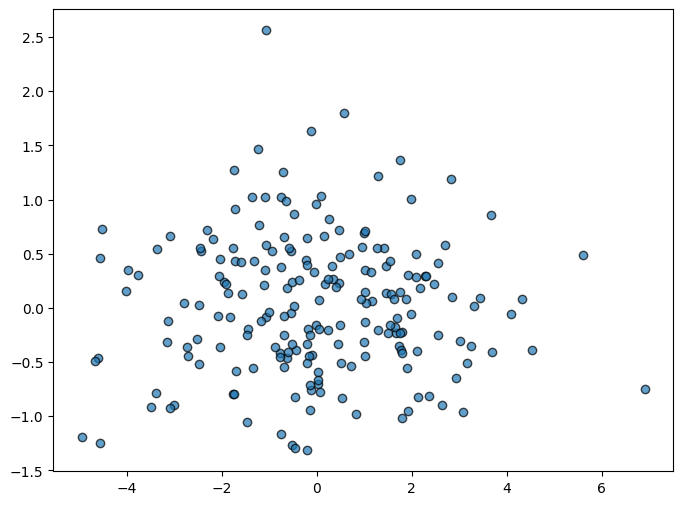

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(projection_pc1,projection_pc2, edgecolor='k', alpha=0.7)

Now that we have these coordinates, we can use them to represent the projections of each data point along the principal directions in the original feature space.

In code:


In [11]:
#  multiply by the unit vector direction.
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

#### Plot the results
Now let's visualize this.


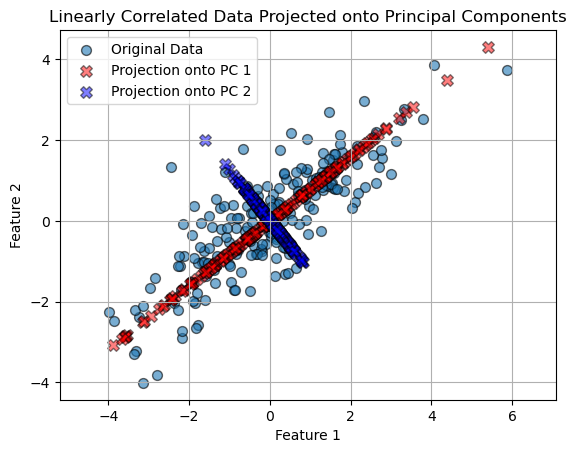

In [12]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

It took some effort but now we can see what the the principal coordinates mean.

The data varies in two main directions. 
- The first direction, in red, is aligned in the direction having the widest variation.


# Part II. PCA for feature space dimensionality reduction
For this second application, we will use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.

This will have the added benefit of enabling we to visualize some of the most important structures in the dataset.


### Load and preprocess Iris data
Let's start by loading the iris data and standardizing is features.


In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Initialize a PCA model and reduce the Iris data set dimensionality to two components


In [15]:
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

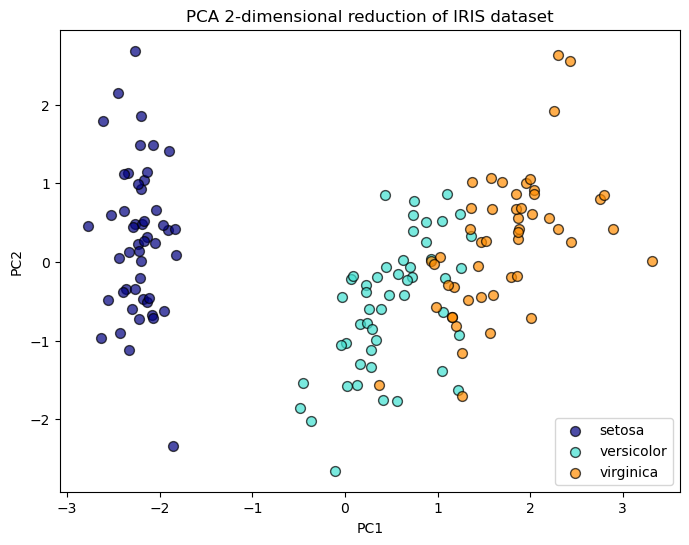

In [16]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

## Reflection
Examine the plot and consider how well the Iris classes have been separated simply by projecting the feature space down to two principal components.


### What percentage of the original feature space variance do these two combined principal components explain?


In [17]:

pca.explained_variance_ratio_.sum()

np.float64(0.9581320720000164)

<details><summary>Click here for the solution</summary>

```python

100*pca.explained_variance_ratio_.sum()
```

</details>


## A deeper look at the explained variances
In this next and final set of exercises, our goal is to:
- Acquire and plot the PCA-explained variance ratios for all four Iris features as a barplot
- Overlay the cummulative explained variance

### Reinitialize the PCA model without reducing the dimension
Standardize the Iris data, and fit and transform the scaled data.


In [18]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

[0.72962445 0.95813207 0.99482129 1.        ]


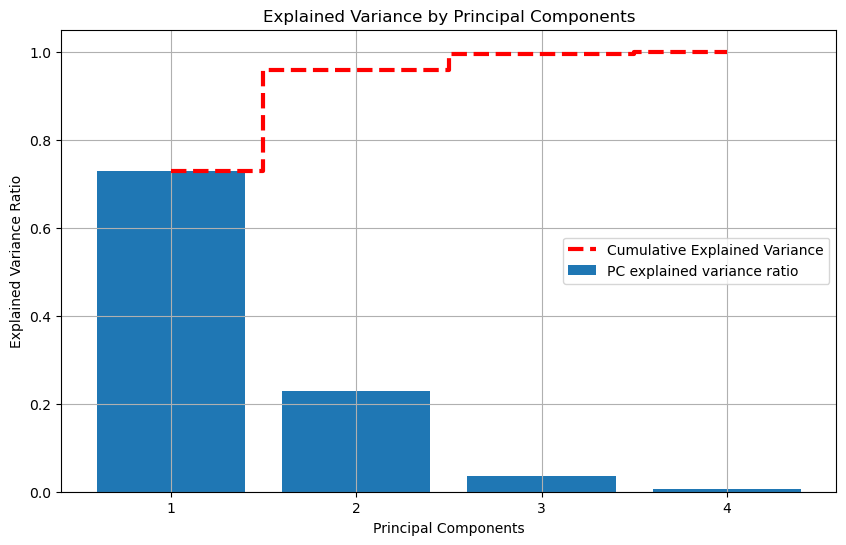

In [19]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')


# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

Here are some considerations:
- What does the red dashed line indicate to we?
- What would we consider doing if our wanted to suppress some noise in our data?
